<a href="https://colab.research.google.com/github/SpartanC322/FinalYearProject/blob/main/FGOBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
# Killswitch in case of RAM issue
# import os
# os.kill(os.getpid(), 9)

time: 1.29 ms (started: 2022-04-27 20:52:31 +00:00)


In [238]:
import random as rd
import pandas as pd
from itertools import combinations as combo
from itertools import permutations as perm
import numpy as np
import cv2
from google.colab.patches import cv2_imshow as googImShow

from google.colab import drive
drive.mount('/content/drive')

!pip install ipython-autotime

%load_ext autotime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.54 s (started: 2022-04-27 20:52:31 +00:00)


In [239]:
#Attack Cards
class Card:
  card_name = ""
  card_owner = ""
  multip = 0
  charge = 0

  def __init__(self,card_name):
    self.card_name = card_name
    if(self.card_name == "Buster"):
      self.multip = 1.5
    if(self.card_name == "Arts"):
      self.multip = 1
    if(self.card_name == "Quick"):
      self.multip = 0.8

  def assign_owner(self, owner):
    self.card_owner = owner

time: 13.6 ms (started: 2022-04-27 20:52:36 +00:00)


In [240]:
#Player Combatant
class Servant:
  serv_name = ""
  serv_class = ""
  serv_damage = ""
  serv_health = ""
  np = 0
  cards = []
  current_card = []
  is_support = False

  def __init__(self,serv_name ,serv_class, serv_health, serv_damage, is_support):
    self.serv_name = serv_name
    self.serv_class = serv_class
    self.serv_health = serv_health
    self.serv_damage = serv_damage
    self.is_support = is_support

  def add_cards(self, cards = [Card]):
    for card in range(len(cards)):
      self.cards.append(cards[card])
      cards[card].assign_owner = self

  def attack(self, enemy):
    loss = enemy.en_health - self.serv_damage
    enemy.en_health = enemy.en_health - loss
    print(enemy.en_name + " has lost " + str(loss) + " and is now at " + str(enemy.en_health))

time: 18 ms (started: 2022-04-27 20:52:36 +00:00)


In [241]:
#Non Plyaer Combatant
class Enemy:
  en_name = ""
  en_class = ""
  en_health = 0
  en_damage = 0

  def __init__(self, en_name, en_class, en_health, en_damage):
    self.en_name = en_name
    self.en_class = en_class
    self.en_health = en_health
    self.en_damage = en_damage

  def attack(self, servant = Servant):
    servant.serv_health = servant.serv_health - self.en_damage

time: 6.84 ms (started: 2022-04-27 20:52:36 +00:00)


In [242]:
#Create all possible combinations from given list
def Pick_r_from(r,list_of_items):
  if r ==1:
    return list( map(lambda e:[e],list_of_items))
  sequences = []
  for item_index in range(len(list_of_items)):
    for remaining in Pick_r_from(r-1,list_of_items[:item_index]+list_of_items[item_index+1:]):
      sequences.append([list_of_items[item_index]]+ remaining)
  return sequences

time: 5.4 ms (started: 2022-04-27 20:52:36 +00:00)


In [243]:
Pick_r_from(3,[1,2,3,4,5])

[[1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 3, 2],
 [1, 3, 4],
 [1, 3, 5],
 [1, 4, 2],
 [1, 4, 3],
 [1, 4, 5],
 [1, 5, 2],
 [1, 5, 3],
 [1, 5, 4],
 [2, 1, 3],
 [2, 1, 4],
 [2, 1, 5],
 [2, 3, 1],
 [2, 3, 4],
 [2, 3, 5],
 [2, 4, 1],
 [2, 4, 3],
 [2, 4, 5],
 [2, 5, 1],
 [2, 5, 3],
 [2, 5, 4],
 [3, 1, 2],
 [3, 1, 4],
 [3, 1, 5],
 [3, 2, 1],
 [3, 2, 4],
 [3, 2, 5],
 [3, 4, 1],
 [3, 4, 2],
 [3, 4, 5],
 [3, 5, 1],
 [3, 5, 2],
 [3, 5, 4],
 [4, 1, 2],
 [4, 1, 3],
 [4, 1, 5],
 [4, 2, 1],
 [4, 2, 3],
 [4, 2, 5],
 [4, 3, 1],
 [4, 3, 2],
 [4, 3, 5],
 [4, 5, 1],
 [4, 5, 2],
 [4, 5, 3],
 [5, 1, 2],
 [5, 1, 3],
 [5, 1, 4],
 [5, 2, 1],
 [5, 2, 3],
 [5, 2, 4],
 [5, 3, 1],
 [5, 3, 2],
 [5, 3, 4],
 [5, 4, 1],
 [5, 4, 2],
 [5, 4, 3]]

time: 10.4 ms (started: 2022-04-27 20:52:36 +00:00)


In [244]:
#Test Pick_r_from
l = Pick_r_from(3,["q","q","a","b","b"])
l[0]

['q', 'q', 'a']

time: 5.88 ms (started: 2022-04-27 20:52:36 +00:00)


In [245]:
#Import Servant CSV from google drive
path = "/content/drive/MyDrive/FYP/Servants.csv"
servants_df = pd.read_csv(path)

print(servants_df)

         Name   Class  Health  Damage   Card1   Card2 Card3  Card4  Card5
0    Napolean  Archer   20000   10000  Buster  Buster  Arts   Arts  Quick
1  Ereshkigal  Lancer   25000   12000  Buster  Buster  Arts  Quick  Quick
2        Nero   Saber   20000   20000  Buster  Buster  Arts   Arts  Quick
time: 18 ms (started: 2022-04-27 20:52:36 +00:00)


In [246]:
#Import Enemy CSV from google drive
path = "/content/drive/MyDrive/FYP/Enemies.csv"
enemies_df = pd.read_csv(path)

print(enemies_df)

         Name     Class  Damage        Health
0  Jeff Bezos     Ruler       3  200000000000
1  Bill Gates    Caster       1  120000000000
2   Elon Musk  Assassin       2  304000000000
time: 12.2 ms (started: 2022-04-27 20:52:36 +00:00)


In [247]:
enemies_df.head(5)

Name     Class  Damage        Health
0  Jeff Bezos     Ruler       3  200000000000
1  Bill Gates    Caster       1  120000000000
2   Elon Musk  Assassin       2  304000000000

time: 13.9 ms (started: 2022-04-27 20:52:36 +00:00)


In [248]:
#Converts list of Strings to list of Cards
def convert_to_card(card_string = []):
  cards = []
  for card in range(5):
    #print(str(card_string[card]))
    name = str(card_string[card])
    _ = Card(name)
    #print(_.card_name)
    cards.append(_)
  return cards

time: 5.04 ms (started: 2022-04-27 20:52:36 +00:00)


In [249]:
#Test conversion of cards
cards = ["b","b","a","a","q"]
print(cards)

cards = convert_to_card(cards)
print(cards[0].card_name)

['b', 'b', 'a', 'a', 'q']
b
time: 3.47 ms (started: 2022-04-27 20:52:36 +00:00)


In [250]:
#Sets owner of cards
def adopt_cards(card_list = [Card], serv = Servant):
  for card in range(len(card_list)):
    card_list[card].card_owner = serv

time: 2.27 ms (started: 2022-04-27 20:52:36 +00:00)


In [251]:
#Create 3 servants for use

#Which is support
support1 = False
support2 = False
support3 = True

#Servant 1
first_card = servants_df.iloc[0,4]
second_card =  servants_df.iloc[0,5]
third_card = servants_df.iloc[0,6]
fourth_card = servants_df.iloc[0,7]
fifth_card = servants_df.iloc[0,8]

cards = [first_card,second_card,third_card,fourth_card,fifth_card]

serv1 = Servant(str(servants_df.iloc[0,0]), str(servants_df.iloc[0,1]), int(servants_df.iloc[0,2]), int(servants_df.iloc[0,3]), support1)
cards = convert_to_card(cards)

serv1.cards = []
serv1.add_cards(cards)

adopt_cards(serv1.cards, serv1)

serv1.current_cards = serv1.cards

print(serv1.serv_name + " is of class " + serv1.serv_class + " with cards: ")
print(serv1.cards)
print("These cards are owned by: ")
print(serv1.cards[0].card_owner.serv_name)
print(serv1.cards[0].card_name)

print("\n")

#End of Servant 1

#Servant 2
first_card = servants_df.iloc[1,4]
second_card =  servants_df.iloc[1,5]
third_card = servants_df.iloc[1,6]
fourth_card = servants_df.iloc[1,7]
fifth_card = servants_df.iloc[1,8]

cards = [first_card,second_card,third_card,fourth_card,fifth_card]

serv2 = Servant(str(servants_df.iloc[1,0]), str(servants_df.iloc[1,1]), int(servants_df.iloc[1,2]), int(servants_df.iloc[1,3]), support2)
cards = convert_to_card(cards)

serv2.cards = []
serv2.add_cards(cards)

adopt_cards(serv2.cards, serv2)

serv2.current_cards = serv2.cards

print(serv2.serv_name + " is of class " + serv2.serv_class + " with cards: ")
print(serv2.cards)
print("These cards are owned by: ")
print(serv2.cards[0].card_owner.serv_name)
print(serv2.cards[2].card_name)

print("\n")

#End of Servant 2

#Servant 3
first_card = servants_df.iloc[2,4]
second_card =  servants_df.iloc[2,5]
third_card = servants_df.iloc[2,6]
fourth_card = servants_df.iloc[2,7]
fifth_card = servants_df.iloc[2,8]

cards = [first_card,second_card,third_card,fourth_card,fifth_card]

serv3 = Servant(str(servants_df.iloc[2,0]), str(servants_df.iloc[2,1]), int(servants_df.iloc[2,2]), int(servants_df.iloc[2,3]), support3)
cards = convert_to_card(cards)

serv3.cards = []
serv3.add_cards(cards)

adopt_cards(serv3.cards, serv3)

serv3.current_cards = serv3.cards

print(serv3.serv_name + " is of class " + serv3.serv_class + " with cards: ")
print(serv3.cards)
print("These cards are owned by: ")
print(serv3.cards[0].card_owner.serv_name)
print(serv3.cards[4].card_name)

#End of Servant 3

Napolean is of class Archer with cards: 
[<__main__.Card object at 0x7fc4b0354750>, <__main__.Card object at 0x7fc4af3fa490>, <__main__.Card object at 0x7fc4af3fa190>, <__main__.Card object at 0x7fc4af3fa450>, <__main__.Card object at 0x7fc4acca9050>]
These cards are owned by: 
Napolean
Buster


Ereshkigal is of class Lancer with cards: 
[<__main__.Card object at 0x7fc4acca9290>, <__main__.Card object at 0x7fc4acca53d0>, <__main__.Card object at 0x7fc4acca5b50>, <__main__.Card object at 0x7fc4acca5850>, <__main__.Card object at 0x7fc4acca5890>]
These cards are owned by: 
Ereshkigal
Arts


Nero is of class Saber with cards: 
[<__main__.Card object at 0x7fc4acca5e50>, <__main__.Card object at 0x7fc4af8ba1d0>, <__main__.Card object at 0x7fc4af8ba610>, <__main__.Card object at 0x7fc4af8ba390>, <__main__.Card object at 0x7fc4af8bad50>]
These cards are owned by: 
Nero
Quick
time: 106 ms (started: 2022-04-27 20:52:36 +00:00)


In [252]:
#Create enemies
nme1 = Enemy(enemies_df.iloc[0,0],enemies_df.iloc[0,1],enemies_df.iloc[0,2],enemies_df.iloc[0,3])
nme2 = Enemy(enemies_df.iloc[1,0],enemies_df.iloc[1,1],enemies_df.iloc[1,2],enemies_df.iloc[1,3])
nme3 = Enemy(enemies_df.iloc[2,0],enemies_df.iloc[2,1],enemies_df.iloc[2,2],enemies_df.iloc[2,3])
             
print("Enemy 1: " + nme1.en_name + "\nClass: " + nme1.en_class + "\nHealth: " + str(nme1.en_health) + "\nDamage: " + str(nme1.en_damage))
print("\n")
print("Enemy 2: " + nme2.en_name + "\nClass: " + nme2.en_class + "\nHealth: " + str(nme2.en_health) + "\nDamage: " + str(nme2.en_damage))
print("\n")
print("Enemy 3: " + nme3.en_name + "\nClass: " + nme3.en_class + "\nHealth: " + str(nme3.en_health) + "\nDamage: " + str(nme3.en_damage))

Enemy 1: Jeff Bezos
Class: Ruler
Health: 3
Damage: 200000000000


Enemy 2: Bill Gates
Class: Caster
Health: 1
Damage: 120000000000


Enemy 3: Elon Musk
Class: Assassin
Health: 2
Damage: 304000000000
time: 7.53 ms (started: 2022-04-27 20:52:36 +00:00)


In [253]:
#Creates representation of game board
class Board:
  current_servs = [Servant]
  current_enemies = [Enemy]
  current_cards = []
  remaining_cards = [Card]
  all_cards = [Card]
  turn_num = 1
  player_move = True
  tree = None

  def __init__(self, characters = [Servant], enemies = [Enemy]):
   self.current_servs = characters
   self.current_enemies = enemies
   self.all_cards = self.get_serv_cards()
   self.remaining_cards = self.all_cards.copy()
   print(len(self.remaining_cards))
   self.current_cards, self.remaining_cards = self.pick_cards(self.current_cards, self.remaining_cards)

  def Display_Board(self):
    print("Serv1: " + self.current_servs[0].serv_name + ": HP: " + str(self.current_servs[0].serv_health) +
          "\nServ2: " + self.current_servs[1].serv_name + ": HP: " + str(self.current_servs[0].serv_health) +
          "\nServ3: " + self.current_servs[2].serv_name + ": HP: " + str(self.current_servs[0].serv_health))
    #print(self.current_cards)

  def pick_cards(self, curr, rem):
    curr.extend(rd.sample(rem, 5))
    print(curr)
    rem = set(rem).difference(curr)
    return curr, rem

  def end_turn(self):
    self.turn_num = self.turn_num + 1
    if (self.turn_num / 2):
      self.player_move = False
    else:
      self.player_move = True

  def get_serv_cards(self):
    cards = []
    cards.extend(self.current_servs[0].cards)
    cards.extend(self.current_servs[1].cards)
    cards.extend(self.current_servs[2].cards)
    return cards

  def state_of_game(self):
    if(self.current_enemies[0].en_health + self.current_enemies[1].en_health + self.current_enemies[2].en_health > 0 and self.current_servs[0].serv_health + self.current_servs[1].serv_health + self.current_servs[2].serv_health > 0):
      return "U"
    if(self.current_servs[0].serv_health + self.current_servs[1].serv_health + self.current_servs[2].serv_health <= 0):
      return "L"
    if(self.current_enemies[0].en_health + self.current_enemies[1].en_health + self.current_enemies[2].en_health <= 0):
      return "W"
    

time: 43.3 ms (started: 2022-04-27 20:52:36 +00:00)


In [254]:
#Decision Tree Node
class Tree_Node:
  def __init__(self, board = Board, cards = [Card], remaining_cards = [Card], turns_ahead = 0):
    self.cards = cards
    self.remaining_cards = remaining_cards
    self.children = []
    self.moves = []
    self.moves_damage = []
    self.moves_np = []
    self.np_prefer = False
    self.turns_ahead = turns_ahead
    self.board = board
    self.points = 0
    
    if turns_ahead == 0:
      self.initial_turn_damage()

    self.create_children()

    for node in self.children:
      node.create_children()
      node.moves = list(perm(remaining_cards, 3))
      if(len(node.moves) > 0):
        node.moves_damage, node.moves_np = maximise_damage(node.moves)
        if len(node.children) > 0:
          child_nps = []
          child_nps.append(find_np_value(self))
          for child in node.children:
            child_nps.append(find_np_value(child))
          high = add_nps(child_nps)
          if high >= 100:
            self.np_prefer = True

    #if (self.board.state_of_game() == "U"):

    #if (self.board.state_of_game() == "L"):

    #if (self.board.state_of_game() == "W"):

  #Finds all moves possible from given set of Cards
  def create_children(self):
    if(self.turns_ahead < 2):
      cards_for_nodes = []
      cards_for_nodes = all_combos(self.remaining_cards)
      next_turn = self.turns_ahead + 1
      for i in cards_for_nodes:
        crnt_cards = self.remaining_cards.copy()
        crnt_cards = set(crnt_cards).difference(i)
        self.children.append(Tree_Node(self.board, i, crnt_cards, next_turn))

  def find_possible_moves(self):
    for move in range(len(self.children)):
      self.moves.append(Pick_r_from(3, self.children[move]))

  def best_move(self):
    if self.np_prefer == True:
      return self.children

  def initial_turn_damage(self):
    self.moves = Pick_r_from(3, self.cards)
    self.moves_damage, self.moves_np = maximise_damage(self.moves)


time: 59 ms (started: 2022-04-27 20:52:36 +00:00)


In [255]:
def setup_cards(serv1c = [],serv2c = [],serv3c = []):
  picked_cards = []

  max_range = len(serv1c) + len(serv2c) + len(serv3c)

  for i in range(5):
    rand = rd.randrange(0,max_range)
    print(rand)
    if(rand <= 4):
      picked_cards.append(serv1c[rand])
      serv1c.pop(rand)
    if(rand >= 4 and rand <= 9):
      picked_cards.append(serv2c[rand - len(serv1c)])
      serv2c.pop(rand - 5)
    if(rand >= 9):
      picked_cards.append(serv3[rand - (len(serv1c) + len(serv2c))])
      serv2c.pop(rand - 10)
  return picked_cards

time: 11.2 ms (started: 2022-04-27 20:52:37 +00:00)


In [256]:
#Gives list of card names
def name_cards(card_list):
  card_names = []
  for i in range(len(card_list)):
    print(card_list[i].card_name)
    card_names.append(card_list[i].card_name)
    
  return card_names

time: 3.63 ms (started: 2022-04-27 20:52:37 +00:00)


In [257]:
def Pick_Attacks(cards = [Card]):
  for card in range(len(cards) - 1):
    if(cards[card].card_owner.serv_damage < cards[card + 1].card_owner.serv_damage):
      cards[card], cards[card + 1] = cards[card + 1], cards[card]
  return cards

time: 3.44 ms (started: 2022-04-27 20:52:37 +00:00)


In [258]:
def Pick_Rand(ra, list = []):
  new_list = []
  for i in range(ra):
    random_item = rd.choice(list)
    new_list.append(random_item)
  return new_list

time: 3.75 ms (started: 2022-04-27 20:52:37 +00:00)


In [259]:
#Find class damage bonuses
def find_class_adv(serv = Servant, nme = Enemy):
  nme_damage = 1
  ser_damage = 1

#Enemy Advantage
  if serv.serv_class == "Saber" and nme.en_class == "Archer":
    nme_damage = 2
    ser_damage = 0.5

    return ser_damage, nme_damage

  if serv.serv_class == "Archer" and nme.en_class == "Lancer":
    nme_damage = 2
    ser_damage = 0.5

    return ser_damage, nme_damage

  if serv.serv_class == "Lancer" and nme.en_class == "Saber":
    nme_damage = 2
    ser_damage = 0.5

    return ser_damage, nme_damage

  if serv.serv_class == "Assassin" and nme.en_class == "Caster":
    nme_damage = 2
    ser_damage = 0.5

    return ser_damage, nme_damage

  if serv.serv_class == "Caster" and nme.en_class == "Rider":
    nme_damage = 2
    ser_damage = 0.5

    return ser_damage, nme_damage

  if serv.serv_class == "Rider" and nme.en_class == "Assassin":
    nme_damage = 2
    ser_damage = 0.5

    return ser_damage, nme_damage

#Berserker for player
  if serv.serv_class == "Berserker":
    nme_damage = 1.5
    ser_damage = 1.5

    return ser_damage, nme_damage

#Player Advantage
  if serv.serv_class == "Saber" and nme.en_class == "Lancer":
    nme_damage = 0.5
    ser_damage = 2

    return ser_damage, nme_damage

  if serv.serv_class == "Lancer" and nme.en_class == "Archer":
    nme_damage = 0.5
    ser_damage = 2

    return ser_damage, nme_damage

  if serv.serv_class == "Archer" and nme.en_class == "Saber":
    nme_damage = 0.5
    ser_damage = 2

    return ser_damage, nme_damage

  if serv.serv_class == "Assassin" and nme.en_class == "Rider":
    nme_damage = 0.5
    ser_damage = 2

    return ser_damage, nme_damage
  
  if serv.serv_class == "Rider" and nme.en_class == "Caster":
    nme_damage = 0.5
    ser_damage = 2

    return ser_damage, nme_damage

  if serv.serv_class == "Caster" and nme.en_class == "Assassin":
    nme_damage = 0.5
    ser_damage = 2

    return ser_damage, nme_damage

#Player used a ruler
  if serv.serv_class == "Ruler" and nme.en_class != "Avenger":
    nme_damage = 0.5
    ser_damage = 1

    return ser_damage, nme_damage

  else:
    return ser_damage, nme_damage

time: 208 ms (started: 2022-04-27 20:52:37 +00:00)


In [260]:
#Finds all combinations
def all_combos(cards = []):
  combos = []
  combos = list(combo(cards, 5))
  return combos

time: 8.27 ms (started: 2022-04-27 20:52:37 +00:00)


In [261]:
#Picks a random set of moves
def pick_moves(moves = []):
  rand_outer = rd.randrange(0,len(moves))
  rand_inner = rd.randrange(0,len(moves[rand_outer]))
  moves[rand_outer][rand_inner]
  return moves[rand_outer][rand_inner], rand_outer, rand_inner

time: 9.69 ms (started: 2022-04-27 20:52:37 +00:00)


In [262]:
#Calculate value of given cards and gives back a list containing all values
def calculate_value_list(cards = [Card]):
  card_value_list = []
  for card in range(len(cards)):
    this_card = cards[card]
    card_value = this_card.multip * this_card.card_owner.serv_damage
    card_charge = this_card.charge
    _ = [card_value, card_charge]
    card_value_list.append(_)
  return card_value_list

time: 12.1 ms (started: 2022-04-27 20:52:37 +00:00)


In [263]:
tes = []

tes.extend(serv1.cards)
tes.extend(serv2.cards)
tes.extend(serv3.cards)

calculate_value_list(tes)

[[15000.0, 0],
 [15000.0, 0],
 [10000, 0],
 [10000, 0],
 [8000.0, 0],
 [18000.0, 0],
 [18000.0, 0],
 [12000, 0],
 [9600.0, 0],
 [9600.0, 0],
 [30000.0, 0],
 [30000.0, 0],
 [20000, 0],
 [20000, 0],
 [16000.0, 0]]

time: 7.7 ms (started: 2022-04-27 20:52:37 +00:00)


In [264]:
#Calculates values for list of lists of cards
def calculate_total_value(cards = [[Card]]):
  damage = []
  for card in range(len(cards)):
    _ = calculate_value_list(cards[card])
    #append sum of 
    dam = [sum(_[0])]
    #append position of card
    dam.append(card)
    #append NP
    dam.append(_[0][1])
    damage.append(dam)

  return damage

time: 9.27 ms (started: 2022-04-27 20:52:37 +00:00)


In [265]:
tes = []

tes.append(serv1.cards)
tes.append(serv2.cards)
tes.append(serv3.cards)

calculate_total_value(tes)

[[15000.0, 0, 0], [18000.0, 1, 0], [30000.0, 2, 0]]

time: 10.8 ms (started: 2022-04-27 20:52:37 +00:00)


In [266]:
#Return highest value of a list
def find_highest_value(my_list):
  my_list = sorted(my_list)
  my_list.reverse()
  return my_list[0]

time: 3.76 ms (started: 2022-04-27 20:52:37 +00:00)


In [267]:
#Gets the combination of cards that do the maximum possible damage
def maximise_damage(my_list = [[Card]]):
  total_values = calculate_total_value(my_list)
  highest_value = find_highest_value(total_values)

  nps = []
  for valu in total_values:
    _ = [valu[2], valu[1]]
    nps.append(_)

  nps = find_highest_value(nps)
  highest_damage = my_list[highest_value[1]], highest_value[0]
  highest_np = my_list[nps[0]], nps[0]

  return highest_damage, highest_np

time: 10.3 ms (started: 2022-04-27 20:52:37 +00:00)


In [268]:
maximise_damage(tes)

(([<__main__.Card at 0x7fc4acca5e50>,
  30000.0),
 ([<__main__.Card at 0x7fc4b0354750>,
  0))

time: 8.79 ms (started: 2022-04-27 20:52:37 +00:00)


In [269]:
#Restock cards
def replace_cards(cards = [Card],all_cards = [Card]):
  diff = set(cards).intersection(all_cards)
  cards.extend(diff)
  return cards

def replace_cards(cards =[Card], servs = [Servant]):
  names = []
  s1 = False
  s2 = False
  s3 = False
  for card in cards:
    names.extend(card.card_owner.serv_name)
  
  for name in names:
    if name == servs[0].serv_name:
      s1 = True
    if name == servs[1].serv_name:
      s2 = True
    if name == servs[2].serv_name:
      s3 = True

  if s1 == False:
    cards.extend(servs[0].cards)
  if s2 == False:
    cards.extend(servs[1].cards)
  if s3 == False:
    cards.extend(servs[2].cards)

  return cards

time: 28.6 ms (started: 2022-04-27 20:52:37 +00:00)


In [270]:
#Part of remove_used_cards
def remove_used_cards(all_cards = [Card], used_cards = [Card]):
  for crd in range(len(used_cards)):
    if(used_cards[crd] in all_cards):
      all_cards.remove(used_cards[crd])
  return all_cards

#Removes used cards
def remove_used_cards_list(all_cards = [], used_cards = []):
  for i in range(len(used_cards)):
    all_cards = remove_used_cards(all_cards, used_cards[i])
  return all_cards

time: 11.5 ms (started: 2022-04-27 20:52:37 +00:00)


In [271]:
#Finds np charge value servants will gain after attack
def find_np_value(tree):
  serv_nps = [[]]
  serv1_np = 0
  serv2_np = 0
  serv3_np = 0
  serv1_name = ""
  serv2_name = ""
  serv3_name = ""
  
  for card in cards:
    if tree.board.current_servs[0].serv_name == card.card_owner.serv_name:
      serv1_np += card.charge

    if tree.board.current_servs[1].serv_name == card.card_owner.serv_name:
      serv2_np += card.charge

    if tree.board.current_servs[2].serv_name == card.card_owner.serv_name:
      serv3_np += card.charge

  return serv1_np, serv2_np, serv3_np

time: 19.5 ms (started: 2022-04-27 20:52:37 +00:00)


In [272]:
def add_nps(nps = [[int]]):
  nps[0] = list(nps[0])
  best_nps = nps[0].copy()
  npst = nps.copy()
  npst.pop(0)

  for np in npst:
    best_nps[0] = best_nps[0] + np[0]
    best_nps[1] = best_nps[1] + np[1]
    best_nps[2] = best_nps[2] + np[2]
    
  return find_highest_value(best_nps)

time: 7.69 ms (started: 2022-04-27 20:52:37 +00:00)


In [273]:
add_nps([[0,0,0],[1,2,3],[1,2,3]])


6

time: 5.72 ms (started: 2022-04-27 20:52:37 +00:00)


In [274]:
#Test Board
my_servs = [serv1,serv2,serv3]
my_enemies = [nme1,nme2,nme3]

brd1 = Board(my_servs,my_enemies)

#print(brd1.current_cards)
#print(name_cards(brd1.current_cards))

brd1.Display_Board()

brd1.current_cards

15
[<__main__.Card object at 0x7fc4af8bad50>, <__main__.Card object at 0x7fc4acca9290>, <__main__.Card object at 0x7fc4acca53d0>, <__main__.Card object at 0x7fc4b0354750>, <__main__.Card object at 0x7fc4acca5e50>]
Serv1: Napolean: HP: 20000
Serv2: Ereshkigal: HP: 20000
Serv3: Nero: HP: 20000


time: 17.2 ms (started: 2022-04-27 20:52:37 +00:00)


In [275]:
tree = Tree_Node(brd1, brd1.current_cards, brd1.remaining_cards)
len(tree.cards)

5

time: 1.03 s (started: 2022-04-27 20:52:37 +00:00)


In [276]:
tree.children[0].moves_damage

((<__main__.Card at 0x7fc4af8ba1d0>,
  <__main__.Card at 0x7fc4acca5b50>),
 30000.0)

time: 8.93 ms (started: 2022-04-27 20:52:38 +00:00)


In [277]:
len(tree.remaining_cards)

10

time: 3.65 ms (started: 2022-04-27 20:52:38 +00:00)


In [278]:
print(tree.children[0].moves)
a = find_np_value(tree.children[0])
print(a)

[(<__main__.Card object at 0x7fc4af8ba610>, <__main__.Card object at 0x7fc4af8ba1d0>, <__main__.Card object at 0x7fc4acca9050>), (<__main__.Card object at 0x7fc4af8ba610>, <__main__.Card object at 0x7fc4af8ba1d0>, <__main__.Card object at 0x7fc4af3fa450>), (<__main__.Card object at 0x7fc4af8ba610>, <__main__.Card object at 0x7fc4af8ba1d0>, <__main__.Card object at 0x7fc4acca5850>), (<__main__.Card object at 0x7fc4af8ba610>, <__main__.Card object at 0x7fc4af8ba1d0>, <__main__.Card object at 0x7fc4af3fa490>), (<__main__.Card object at 0x7fc4af8ba610>, <__main__.Card object at 0x7fc4af8ba1d0>, <__main__.Card object at 0x7fc4acca5890>), (<__main__.Card object at 0x7fc4af8ba610>, <__main__.Card object at 0x7fc4af8ba1d0>, <__main__.Card object at 0x7fc4af8ba390>), (<__main__.Card object at 0x7fc4af8ba610>, <__main__.Card object at 0x7fc4af8ba1d0>, <__main__.Card object at 0x7fc4acca5b50>), (<__main__.Card object at 0x7fc4af8ba610>, <__main__.Card object at 0x7fc4af8ba1d0>, <__main__.Card obj

In [279]:
#OpenCV Template Matching
img = cv2.imread("/content/drive/MyDrive/FYP/Test_img/Battle.jpg", 0)
template = cv2.imread("/content/drive/MyDrive/FYP/Test_img/Napo/Napolean_Quick.jpg", 0)
h,w = template.shape
colour = (0,0,0)

time: 96.6 ms (started: 2022-04-27 20:52:38 +00:00)


In [280]:
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

time: 3.65 ms (started: 2022-04-27 20:52:39 +00:00)


In [281]:
type(img)

numpy.ndarray

time: 4.33 ms (started: 2022-04-27 20:52:39 +00:00)


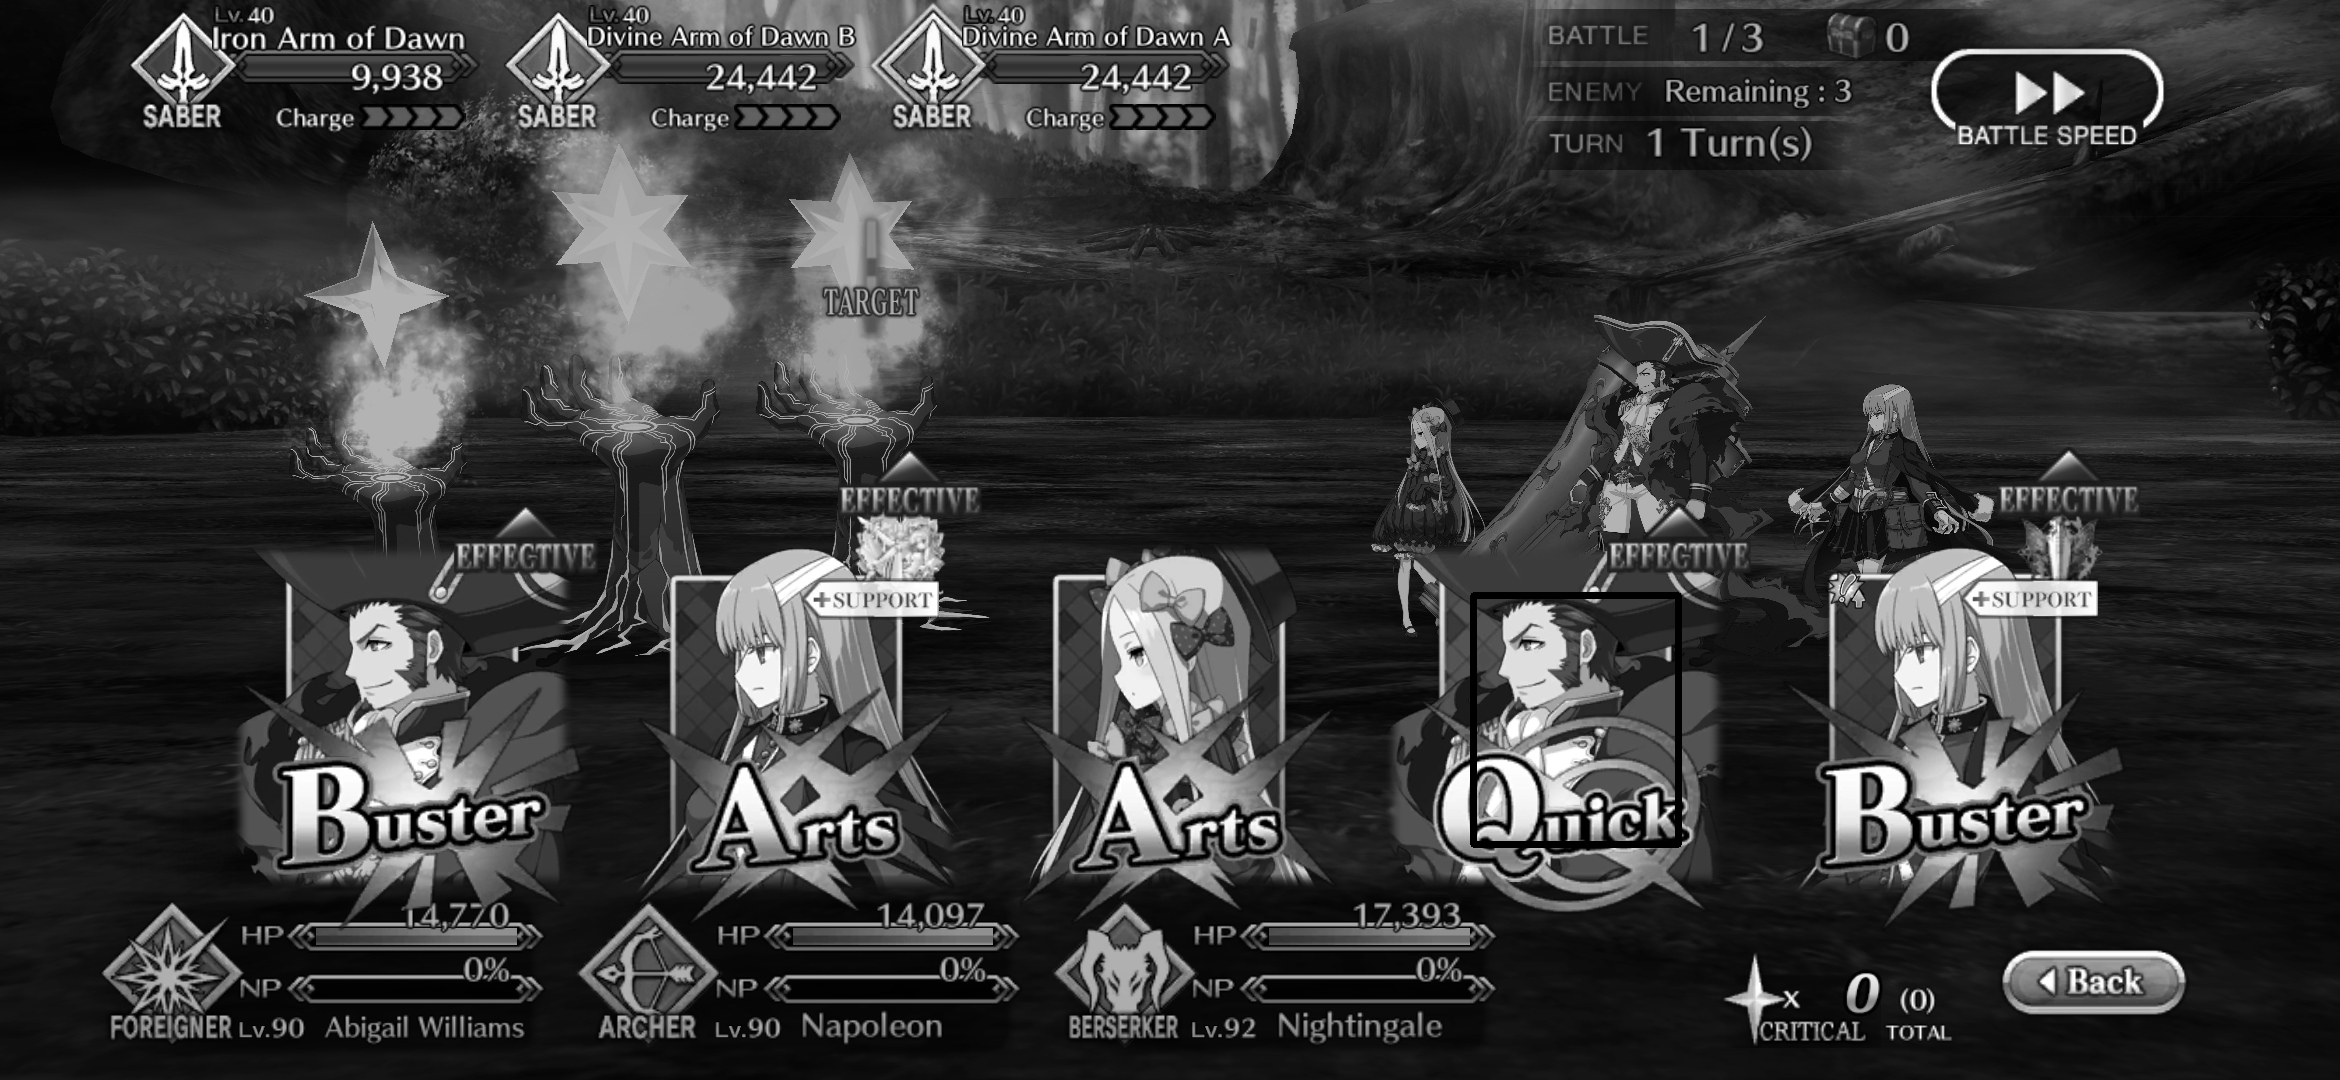

4


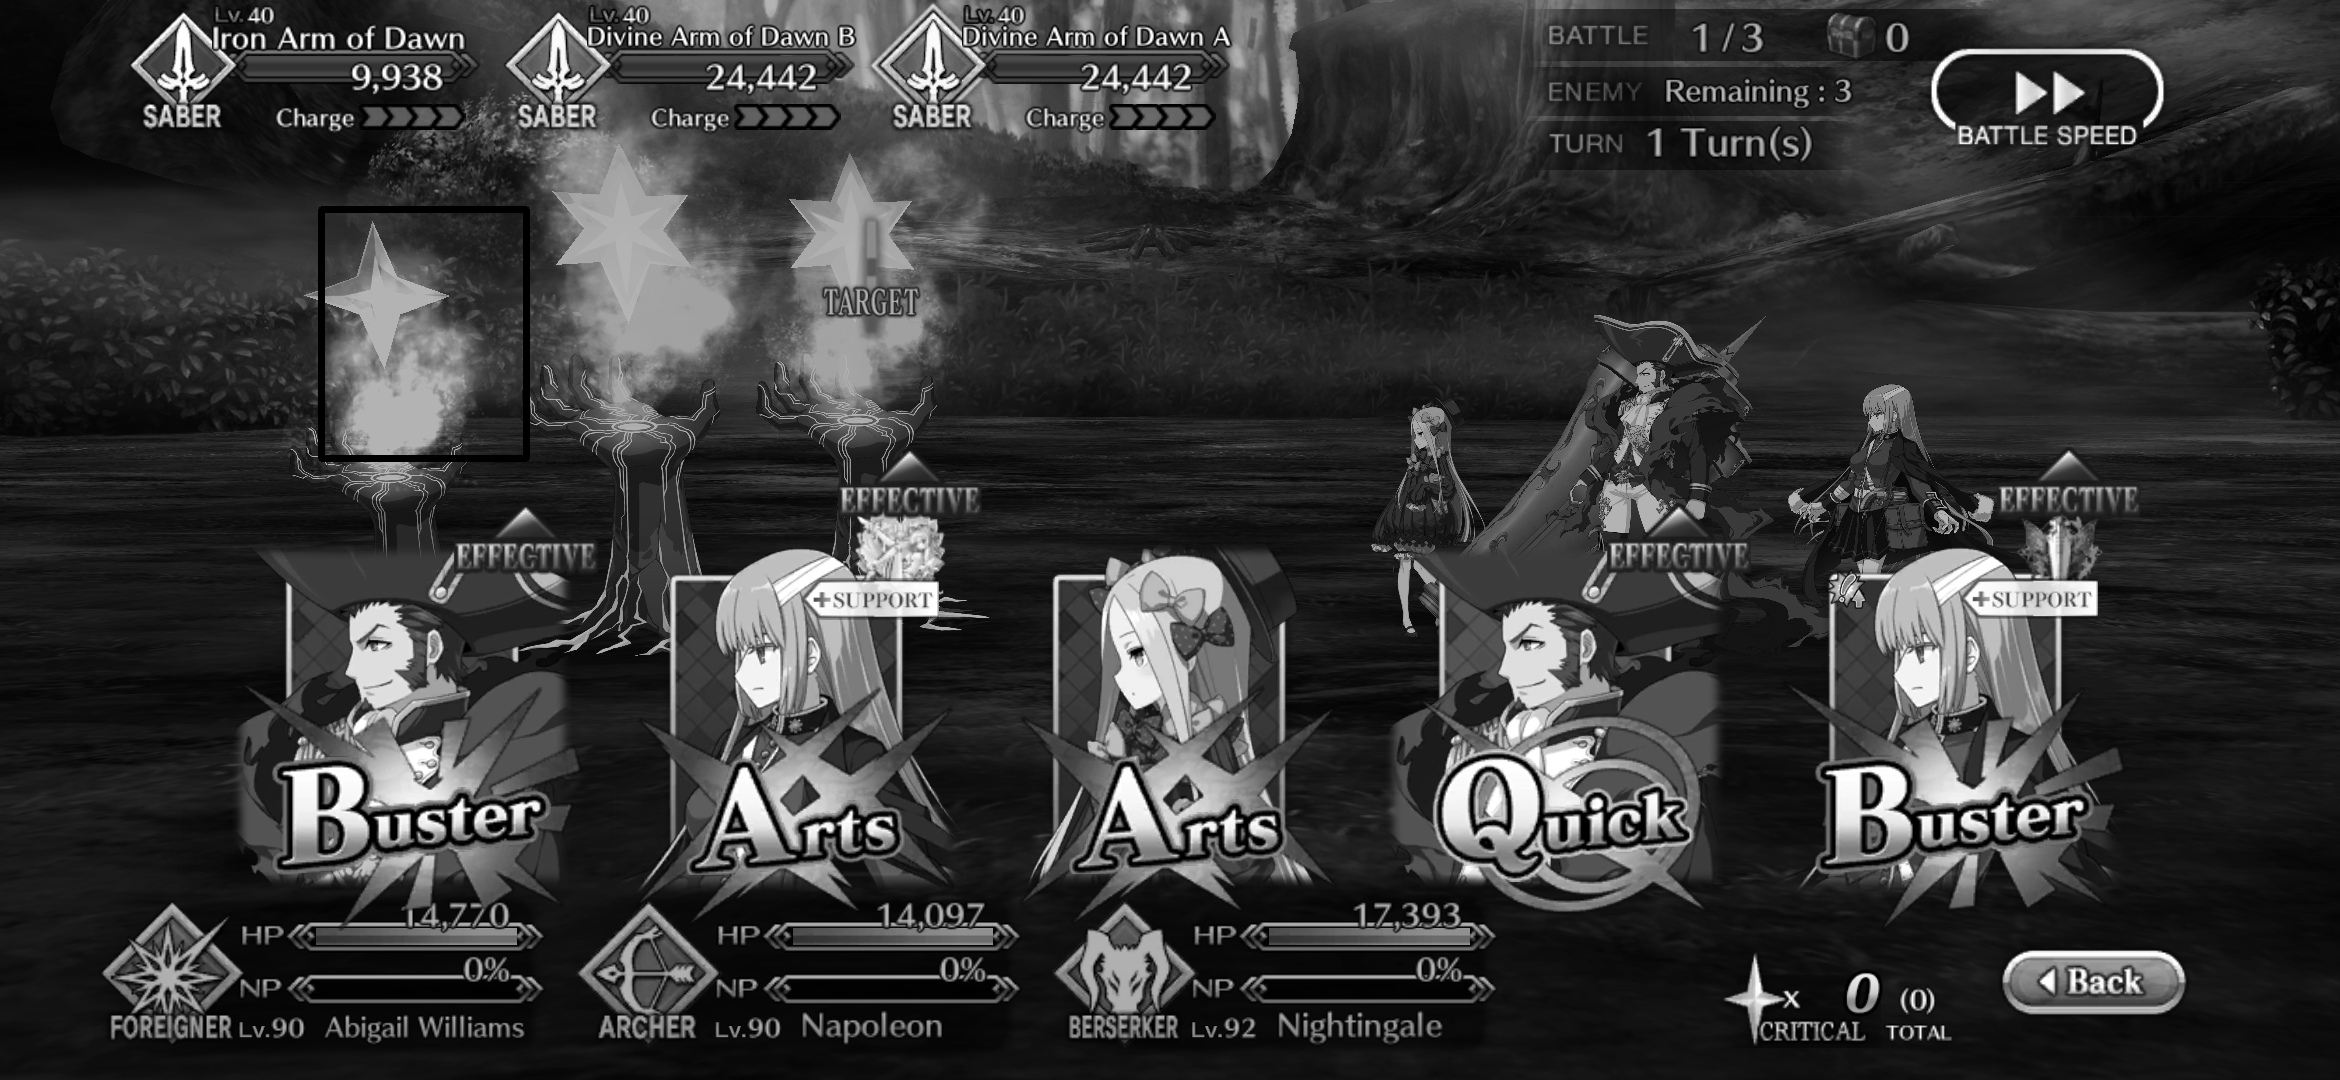

5


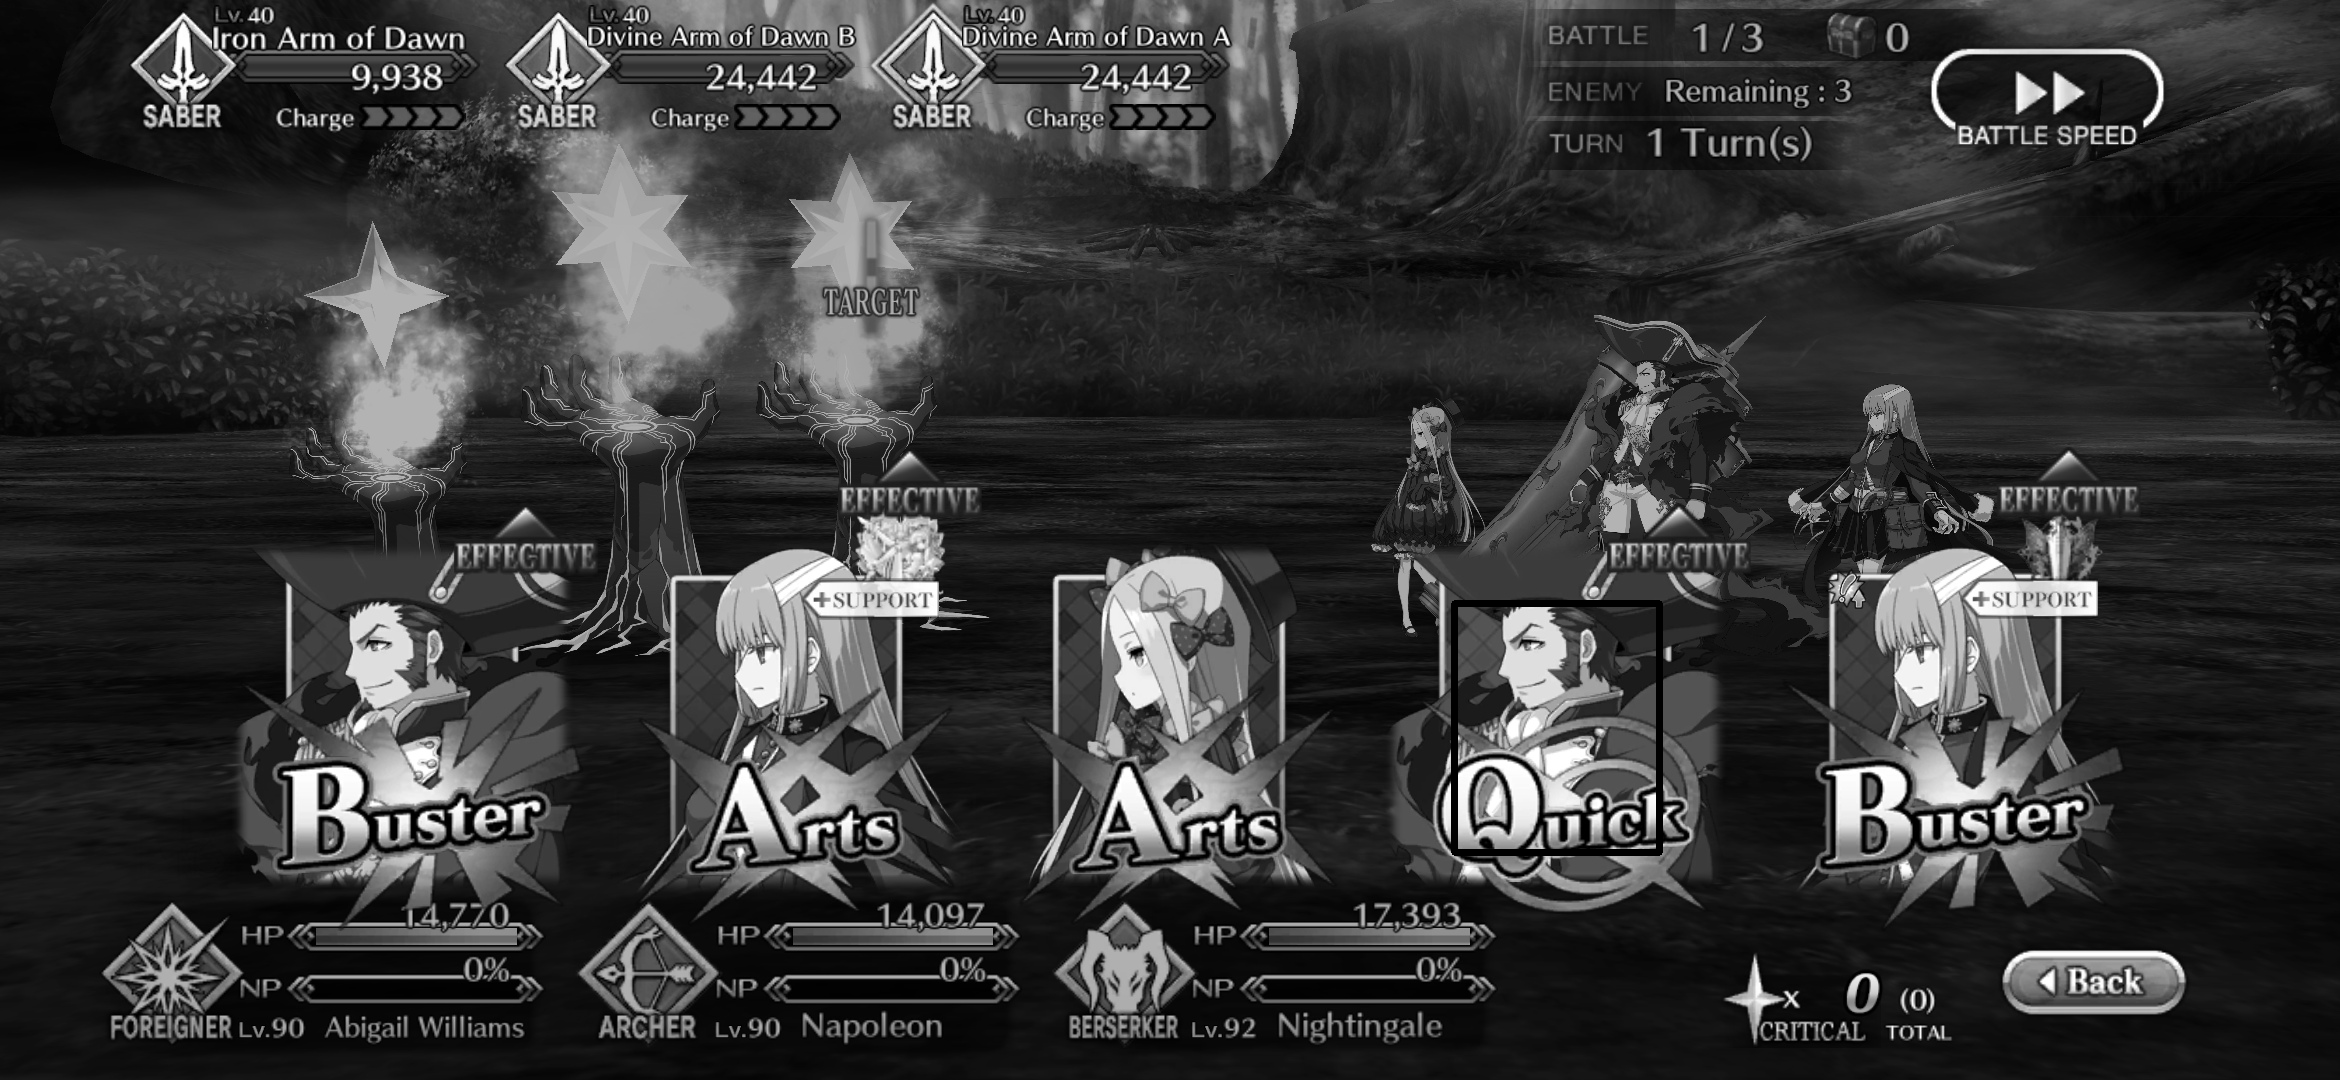

2


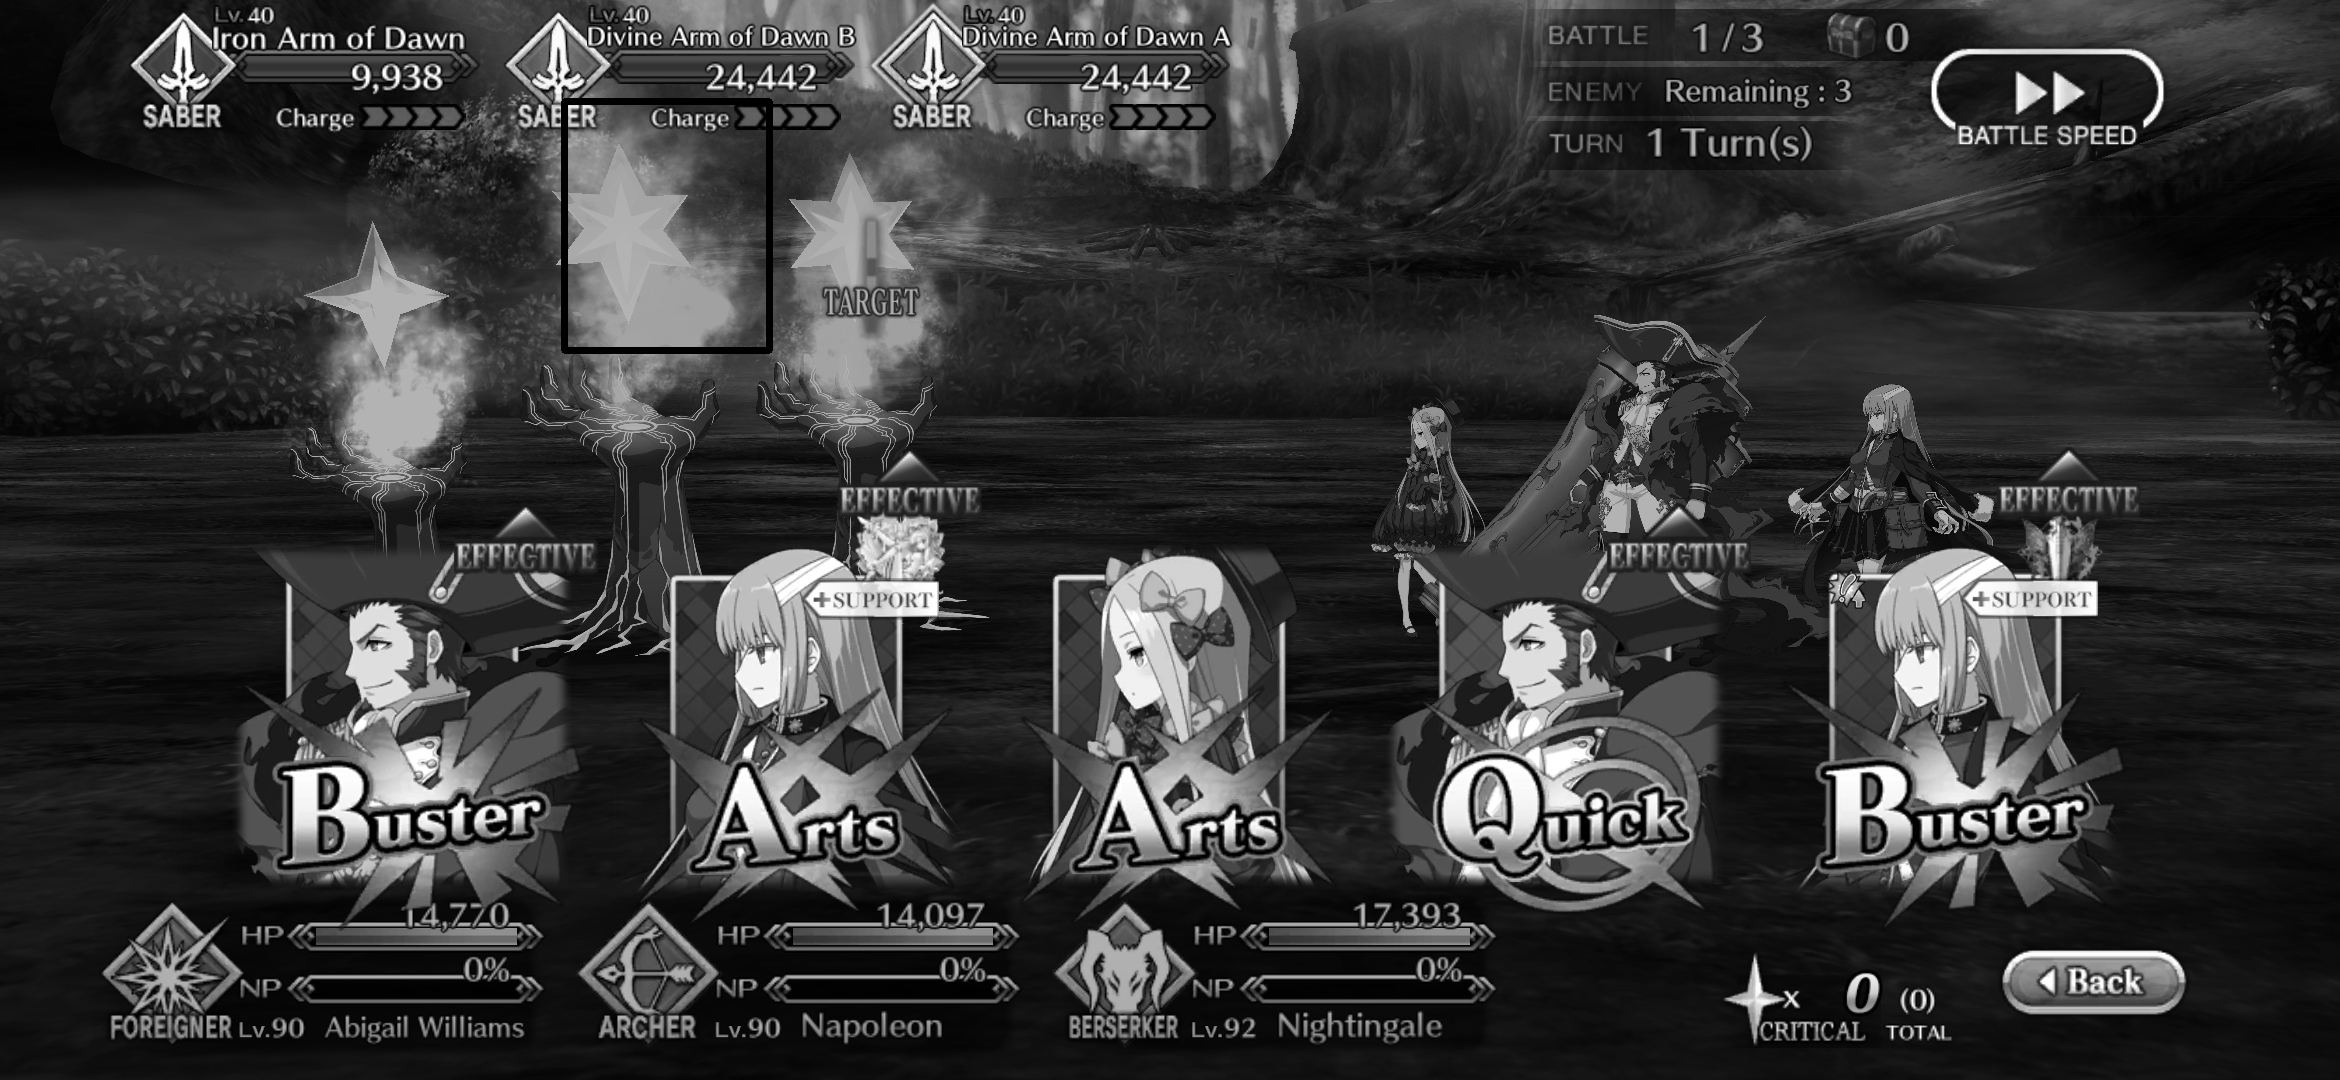

3


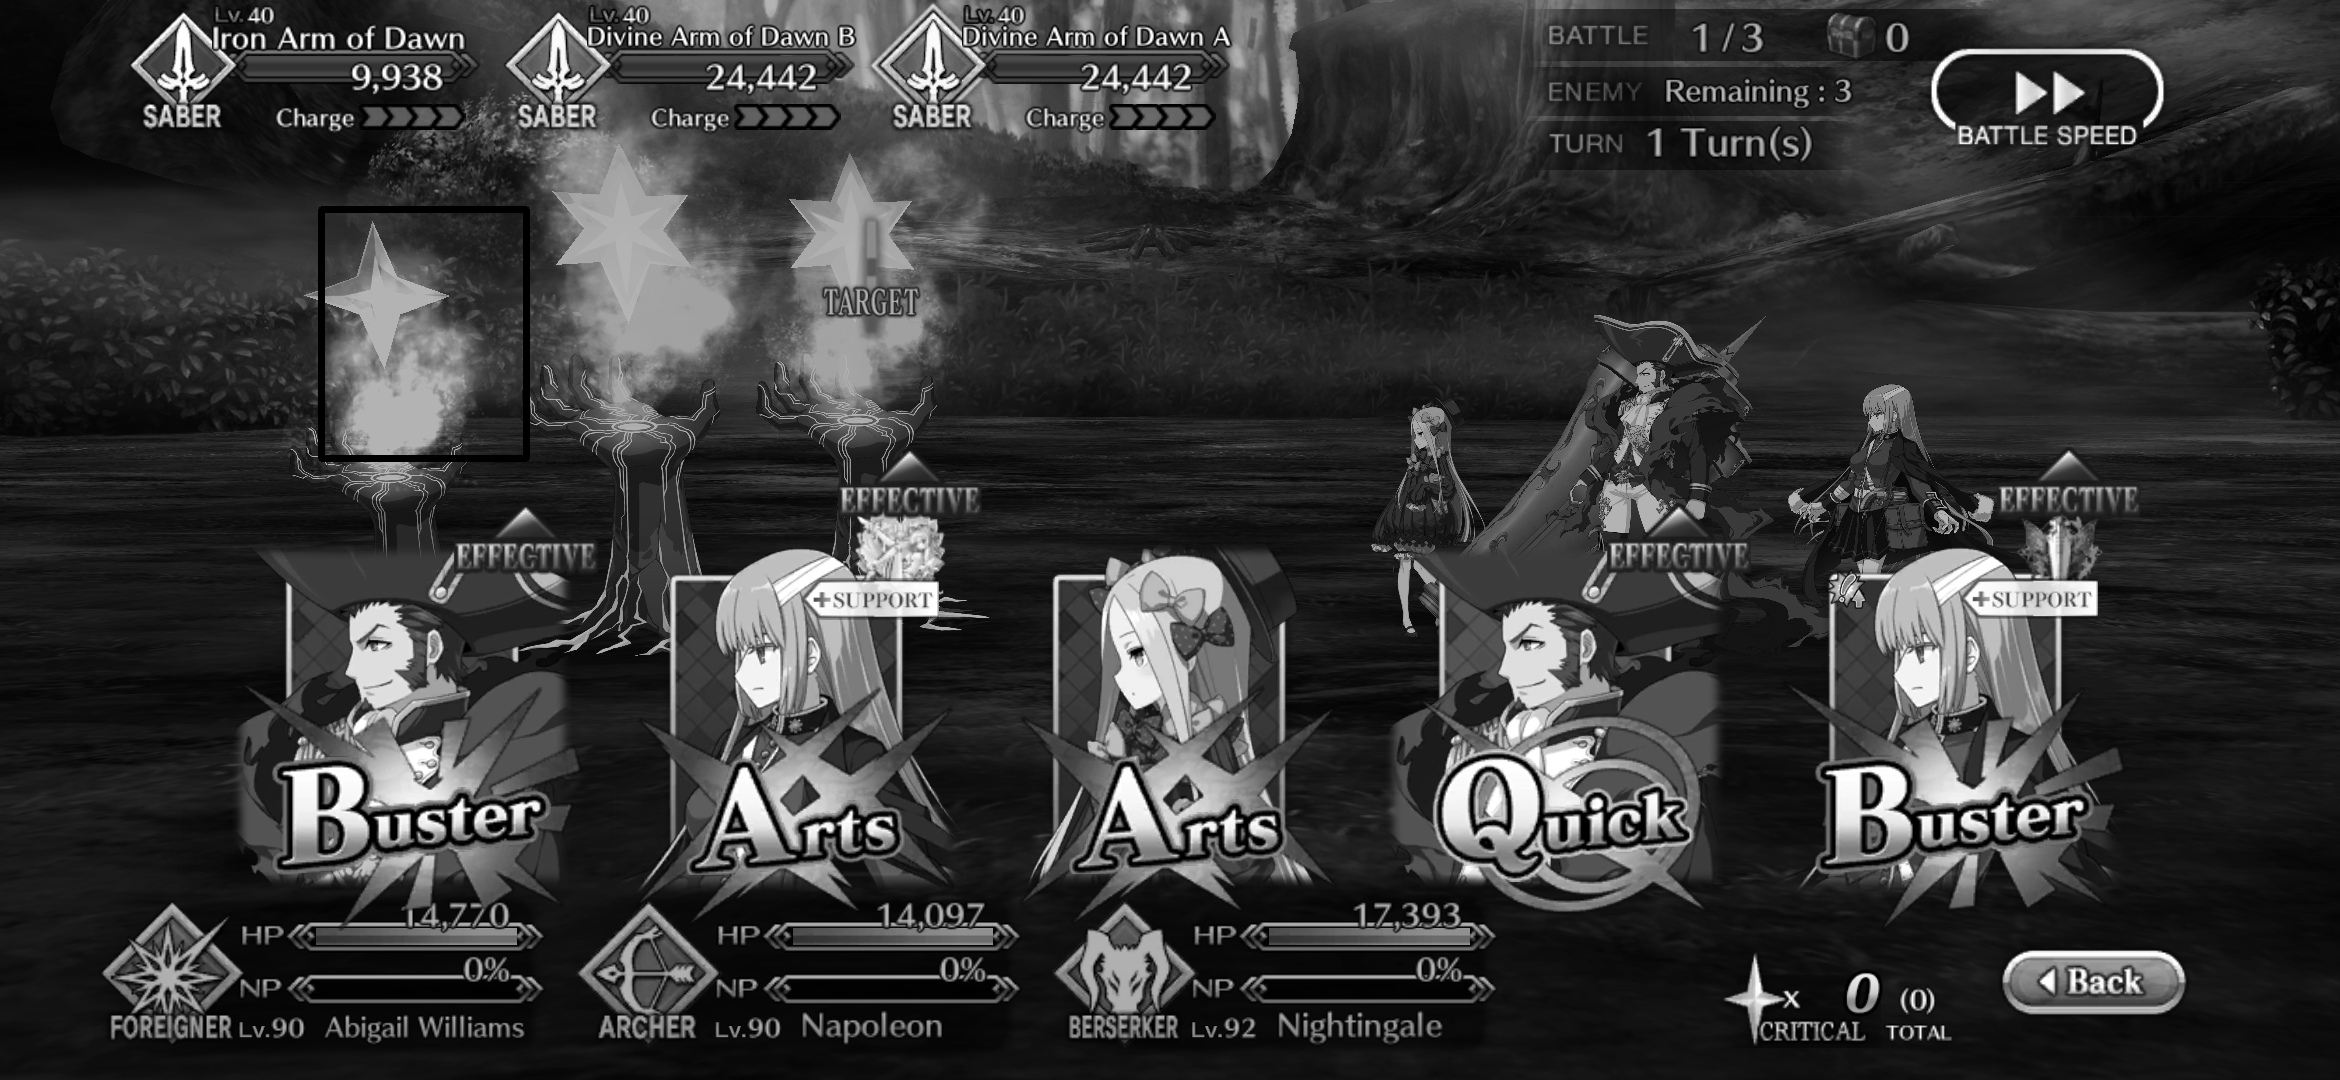

0


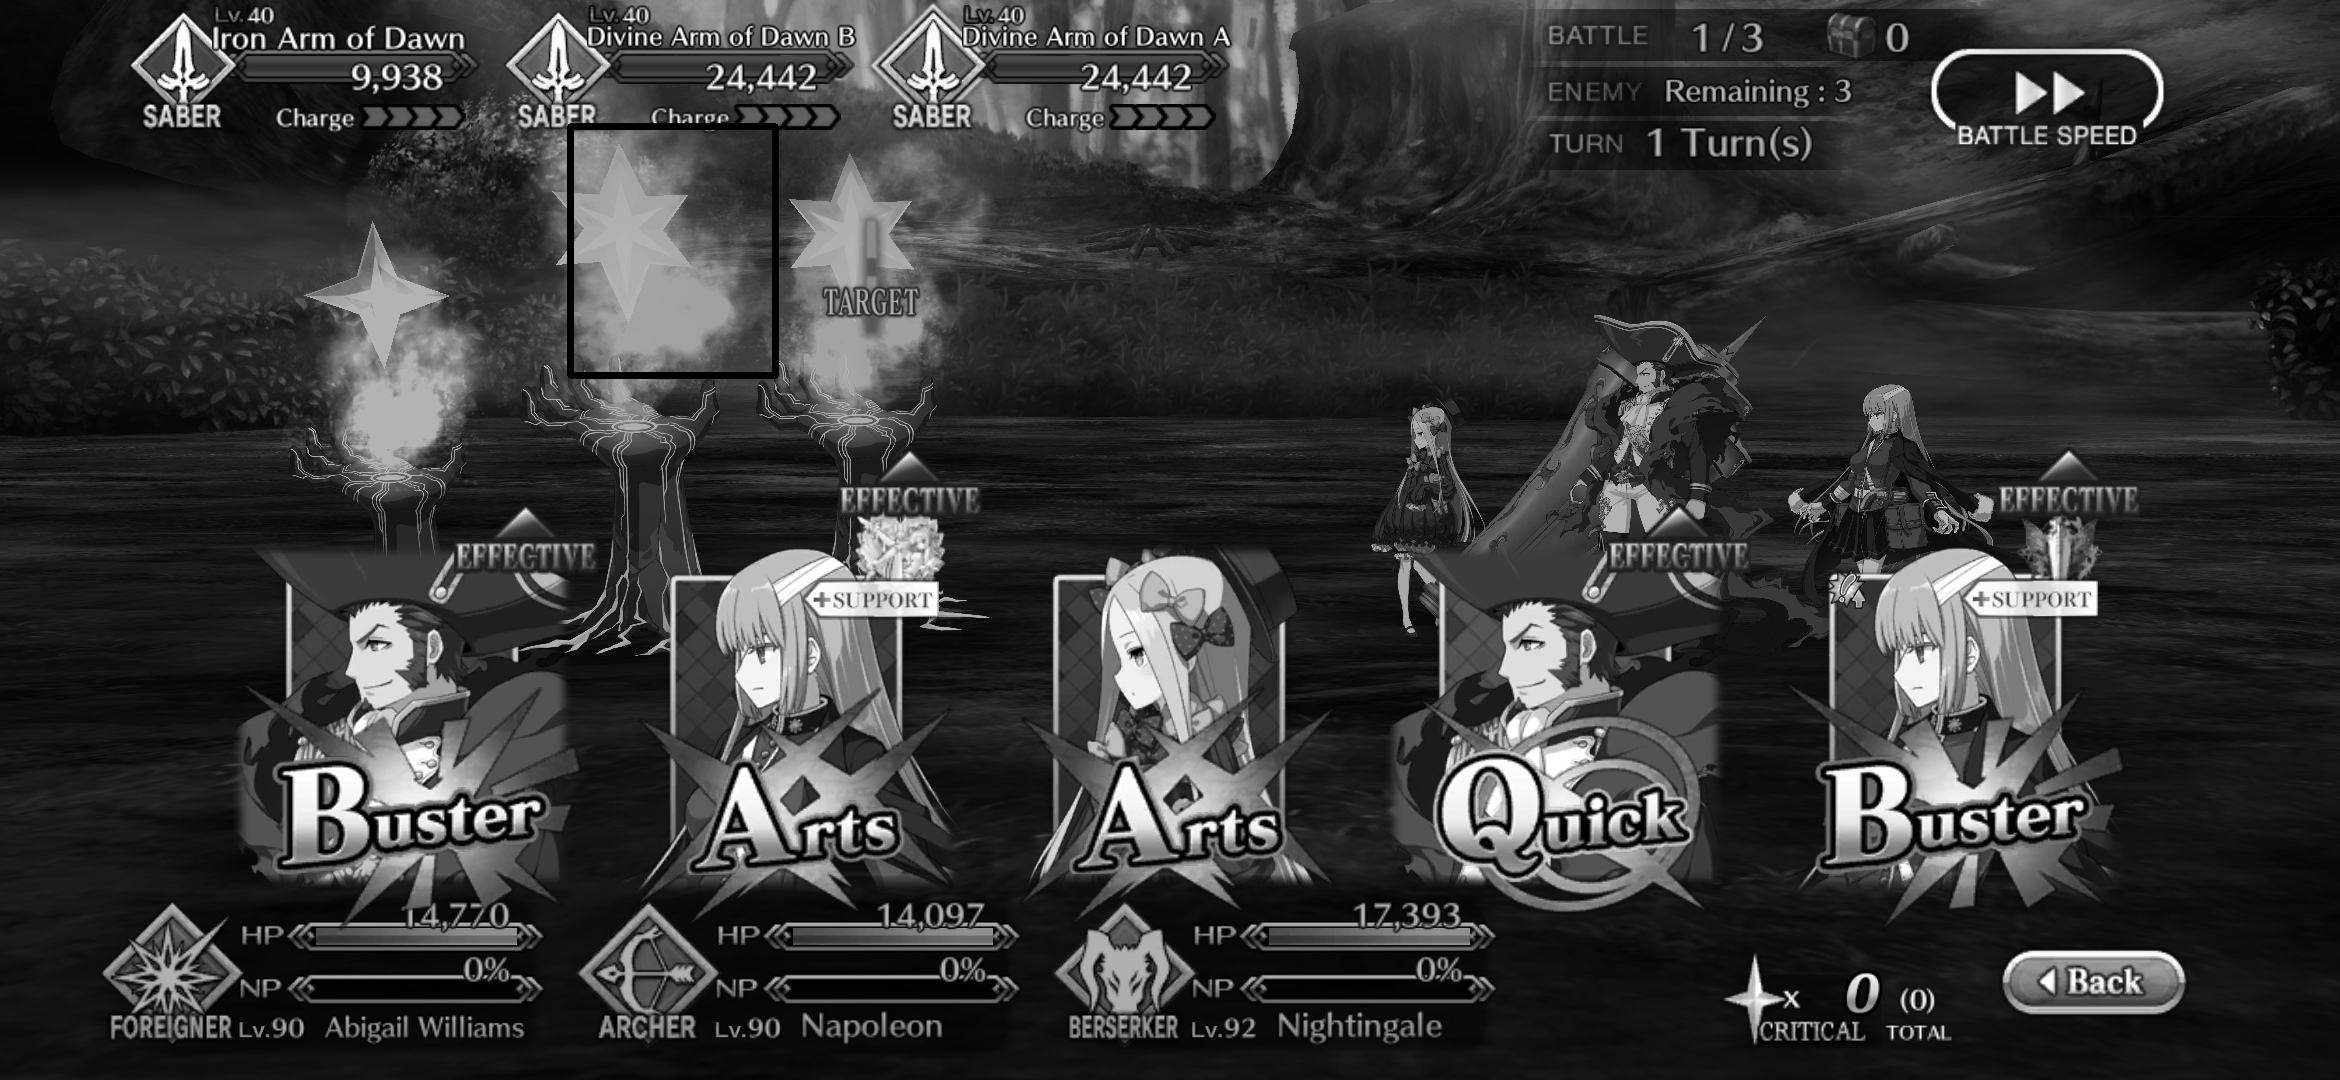

1
time: 6.54 s (started: 2022-04-27 20:52:39 +00:00)


In [282]:
for method in methods:
  img2 = img.copy()

  result = cv2.matchTemplate(img2, template, method)

  # threshold = 0.8

  # loc = np.where(result >= threshold)

  # for pt in zip(*loc[::-1]):
  #   cv2.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

  # googImShow(img2)


  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
  if (method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]):
    location = min_loc
  else:
    location = max_loc

  bottom_right = (location[0] + w, location[1] + h)
  cv2.rectangle(img2, location, bottom_right, colour, 5)
  googImShow(img2)
  #cv2.waitKey(0)
  #cv2.destroyAllWindows()
  print(method)